<font size=4> 2 days late<br>
<font size=6>**name: Yonatan Juarez<br>github: yonatan-juarez-5**<br>
<font size=5>**HW5: Decision Tree and Lasso/Boosting Regression**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.linear_model import LassoCV, Lasso, LinearRegression, RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

<font size=5>**(1) Decision Trees as Interpretable Models**

In [2]:
diagnosis= "../data/diagnosis.data"
communities = "../data/communities.data"

<font size=5>**(1a) Download the accute inflammations data**

In [3]:
# Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination),
# Micturition pains, Burning of urethra, itch, swelling of urethra outlet, 
# decision: Inflammation of urinary bladder, decision: Nephritis of renal pelvis origin
columns = ['temp', 'nausea', 'lumbar', 'urine', 'micturition', 'burning', 'decision1', 'decision2']
diagnosis_data = pd.read_csv(diagnosis, sep='\s+', encoding='UTF_16', header=None, decimal=',', names=columns)

for column in diagnosis_data.columns:
    if all(value in ['yes', 'no'] for value in diagnosis_data[column]):
        diagnosis_data[column] = diagnosis_data[column].map({'yes': 1, 'no': 0})
    
diagnosis_data

,temp,nausea,lumbar,urine,micturition,burning,decision1,decision2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


<font size=5>**(1b) Build a decision tree on the whole data set and plot it**

In [4]:
def build_decision_tree(x_train: pd.DataFrame, y_train:pd.DataFrame):
    decision_tree = DecisionTreeClassifier(random_state=1)
    model = decision_tree.fit(x_train, y_train)
    return decision_tree

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

Decision_Tree


[Text(0.4, 0.875, 'x[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'x[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'x[5] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

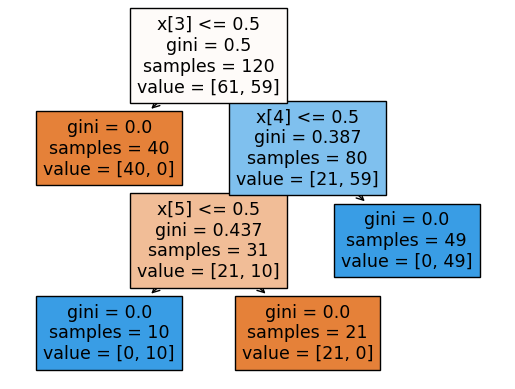

In [5]:
# features vs d1
x_train = diagnosis_data.iloc[:, :6]
y_train = diagnosis_data['decision1']
# print(x_train)
decision_tree_d1 = build_decision_tree(x_train, y_train)
print(tree.export_text(decision_tree_d1))
print("Decision_Tree")

tree.plot_tree(decision_tree_d1, filled=True)



Features vs Decision 2:
|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

Decision_Tree


[Text(0.4, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

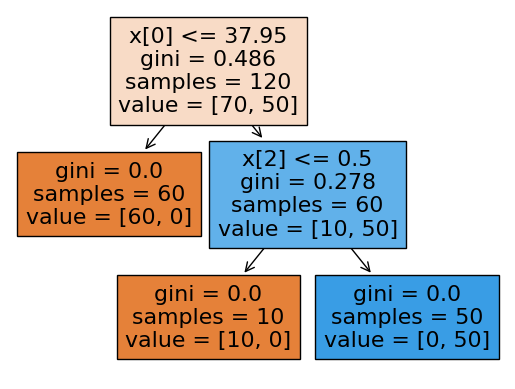

In [6]:
# data vs d2
y_train = diagnosis_data['decision2']
decision_tree_d2 = build_decision_tree(x_train, y_train)

print(f"Features vs Decision 2:\n{tree.export_text(decision_tree_d2)}")
print("Decision_Tree")

tree.plot_tree(decision_tree_d2, filled=True)

Features vs Decision 1 & Decision 2:
|--- temp <= 37.95
|   |--- lumbar <= 0.50
|   |   |--- class: 1
|   |--- lumbar >  0.50
|   |   |--- class: 0
|--- temp >  37.95
|   |--- lumbar <= 0.50
|   |   |--- class: 0
|   |--- lumbar >  0.50
|   |   |--- micturition <= 0.50
|   |   |   |--- class: 0
|   |   |--- micturition >  0.50
|   |   |   |--- urine <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- urine >  0.50
|   |   |   |   |--- class: 0

Decision_Tree


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

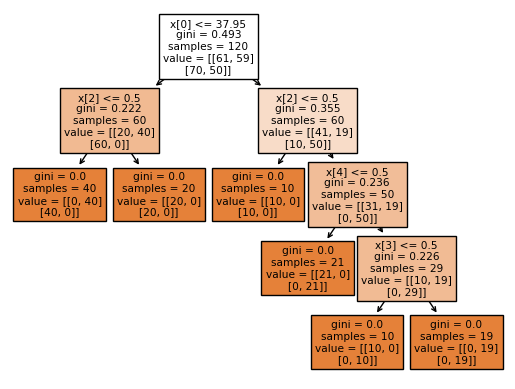

In [7]:
# features vs d1/d2

y_train = diagnosis_data[['decision1','decision2']]
decision_tree = build_decision_tree(x_train, y_train)
print(f"Features vs Decision 1 & Decision 2:\n{tree.export_text(decision_tree, feature_names=columns[:6])}")
print("Decision_Tree")

tree.plot_tree(decision_tree, filled=True)


<font size=5>**(1c) Convert decison tree rules into a set of IF-THEN rules**

In [8]:
def if_then_rules(decision_tree:DecisionTreeClassifier, features):
    tree_ = decision_tree.tree_
    feature_list = []
    for ft in tree_.feature:
        if ft != _tree.TREE_UNDEFINED:
            feature_list.append(features[ft])
        else:
            feature_list.append('undefined')

    print(f"def predict({', '.join(features)}):")
    
    def recurse(node, depth):
        indent = "  " *depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_list[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            
            print("{}return [{}, {}] ".format(indent, tree_.value[node][0], tree_.value[node][1]))
    
    recurse(0,1)

In [9]:
decision_tree = decision_tree
features = columns[:6]
if_then_rules(decision_tree, features)

def predict(temp, nausea, lumbar, urine, micturition, burning):
  if temp <= 37.95:
    if lumbar <= 0.5:
      return [[ 0. 40.], [40.  0.]] 
    else:  # if lumbar > 0.5
      return [[20.  0.], [20.  0.]] 
  else:  # if temp > 37.95
    if lumbar <= 0.5:
      return [[10.  0.], [10.  0.]] 
    else:  # if lumbar > 0.5
      if micturition <= 0.5:
        return [[21.  0.], [ 0. 21.]] 
      else:  # if micturition > 0.5
        if urine <= 0.5:
          return [[10.  0.], [ 0. 10.]] 
        else:  # if urine > 0.5
          return [[ 0. 19.], [ 0. 19.]] 


<font size=5>**(1d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretabilty**

Best ccp value:
0.0
Decision tree using cost-complexity pruning:


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

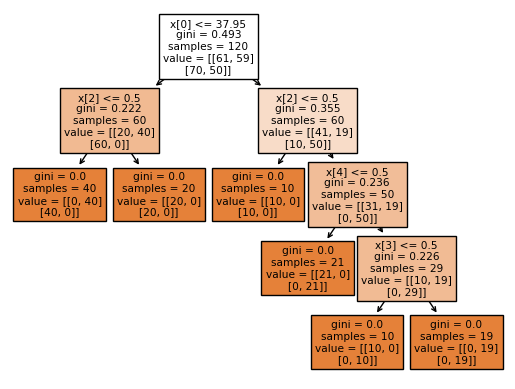

In [10]:
x_train = diagnosis_data.iloc[:, :6]
y_train = diagnosis_data[['decision1', 'decision2']]

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(x_train, y_train)

ccp = decision_tree.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']

ccp_decision_tree = DecisionTreeClassifier(random_state=1)
ccp_decision_tree = GridSearchCV(ccp_decision_tree, cv=5, param_grid={'ccp_alpha': ccp}, scoring='neg_mean_squared_error')
ccp_decision_tree.fit(x_train, y_train)
best_ccp = ccp_decision_tree.best_params_['ccp_alpha']
print(f"Best ccp value:\n{best_ccp}")

decision_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
decision_tree.fit(x_train, y_train)
print("Decision tree using cost-complexity pruning:")
tree.plot_tree(decision_tree, filled=True)


In [11]:
# if-then rules
features = columns[:6]
if_then_rules(decision_tree, features)

def predict(temp, nausea, lumbar, urine, micturition, burning):
  if temp <= 37.95:
    if lumbar <= 0.5:
      return [[ 0. 40.], [40.  0.]] 
    else:  # if lumbar > 0.5
      return [[20.  0.], [20.  0.]] 
  else:  # if temp > 37.95
    if lumbar <= 0.5:
      return [[10.  0.], [10.  0.]] 
    else:  # if lumbar > 0.5
      if micturition <= 0.5:
        return [[21.  0.], [ 0. 21.]] 
      else:  # if micturition > 0.5
        if urine <= 0.5:
          return [[10.  0.], [ 0. 10.]] 
        else:  # if urine > 0.5
          return [[ 0. 19.], [ 0. 19.]] 


<font size=5>**(2) The LASSO and Boosting for Regression**

<font size=5>**(2a) Download the Communities & Crime data**

In [12]:
def get_attributes(filepath):
    names = pd.read_csv(filepath, sep='\t')
    attributes = []
    for val in names[names.columns[0]].values:
        
        if "@attribute" in val:
            attributes.append(val.split(" ")[1])
    
    return attributes

In [13]:

attributes = get_attributes('../data/communities.names')
communities_data = pd.read_csv(communities, na_values='?', names=attributes)
# communities_data
train = communities_data[:1495]
test = communities_data[1495:]

In [14]:
train

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [15]:
test

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17.0,25112.0,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683.0,48952.0,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


<font size=5>**(2b) use data imputation technique to deal with missing values in the data set**

In [16]:
# remove non-predictive features
non_predictive_features = ['state', 'county', 'community', 'communityname', 'fold']
train = train.drop(columns=non_predictive_features)
test = test.drop(columns=non_predictive_features)

In [17]:
# x_train

In [18]:
communities_data = communities_data.drop(columns=non_predictive_features)

In [19]:
columns_with_missing_train = train.columns[train.isnull().any()].tolist()
columns_with_missing_test = test.columns[test.isnull().any()].tolist()

imputer_train = KNNImputer(n_neighbors=2)
# columns_with_missing_train
# columns_with_missing_test
train[columns_with_missing_train] = imputer_train.fit_transform(train[columns_with_missing_train])
test[columns_with_missing_test] = imputer_train.fit_transform(test[columns_with_missing_test])
# train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
# test_imputed = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)
# communities_data_imputed = pd.DataFrame(imputer.fit_transform(communities_data), columns=train.columns)

<font size=5>**(2c) Plot a correlation matrix for the features in the dataset**

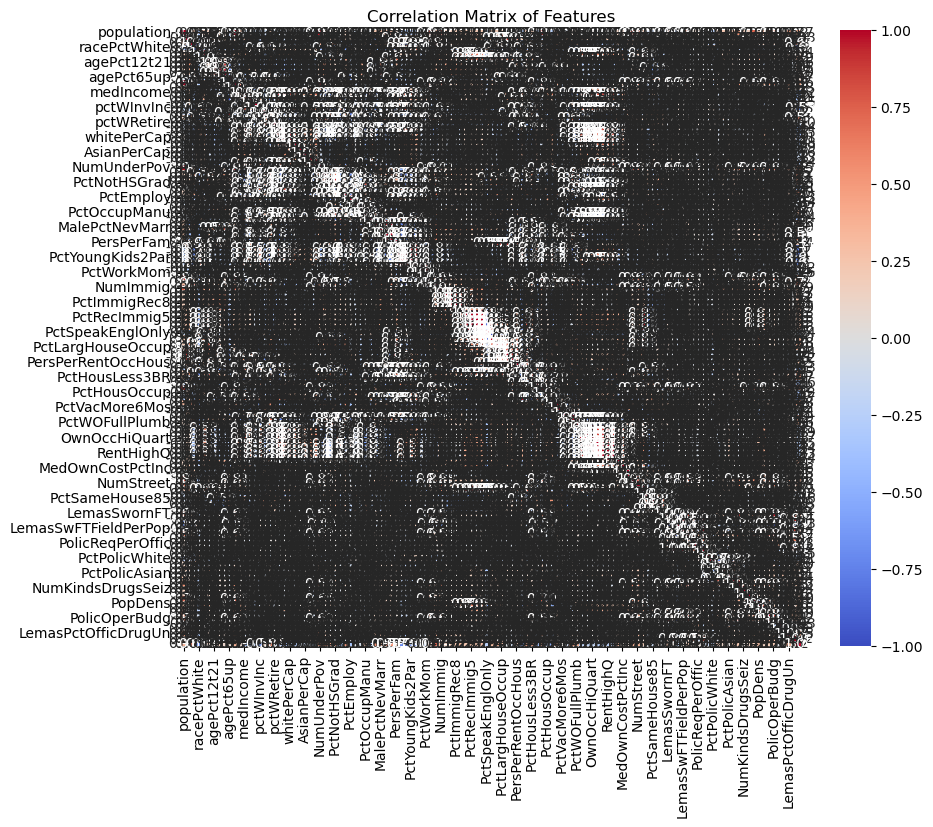

In [20]:
concat_df = pd.concat([train, test], ignore_index=True)

correlation = concat_df.corr()
# correlation.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show()

<font size=5>**(2d) Calculate coefficient of variaton CV for each feature, where CV = s/m**

In [21]:
cv = {}

for column in concat_df.columns:
    mean = concat_df[column].mean()
    std = concat_df[column].std()
    cv[column] = std/mean

cv_df = pd.DataFrame([cv]).T
cv_df.columns = ['Cv']
cv_df

,Cv
population,2.203503
householdsize,0.353298
racepctblack,1.410920
racePctWhite,0.323782
racePctAsian,1.359162
...,...
LemasPctPolicOnPatr,0.206949
LemasGangUnitDeploy,0.632243
LemasPctOfficDrugUn,2.555266
PolicBudgPerPop,0.580775


<font size=5>**(2e) Pick |(128)^1/2| features with the highest CV and make scatter plots and box plots
for them.**

In [22]:
top_values = cv_df.nlargest(int(np.floor(np.sqrt(128))), 'Cv')
top_columns = top_values.T.columns

concat_df[top_columns]

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


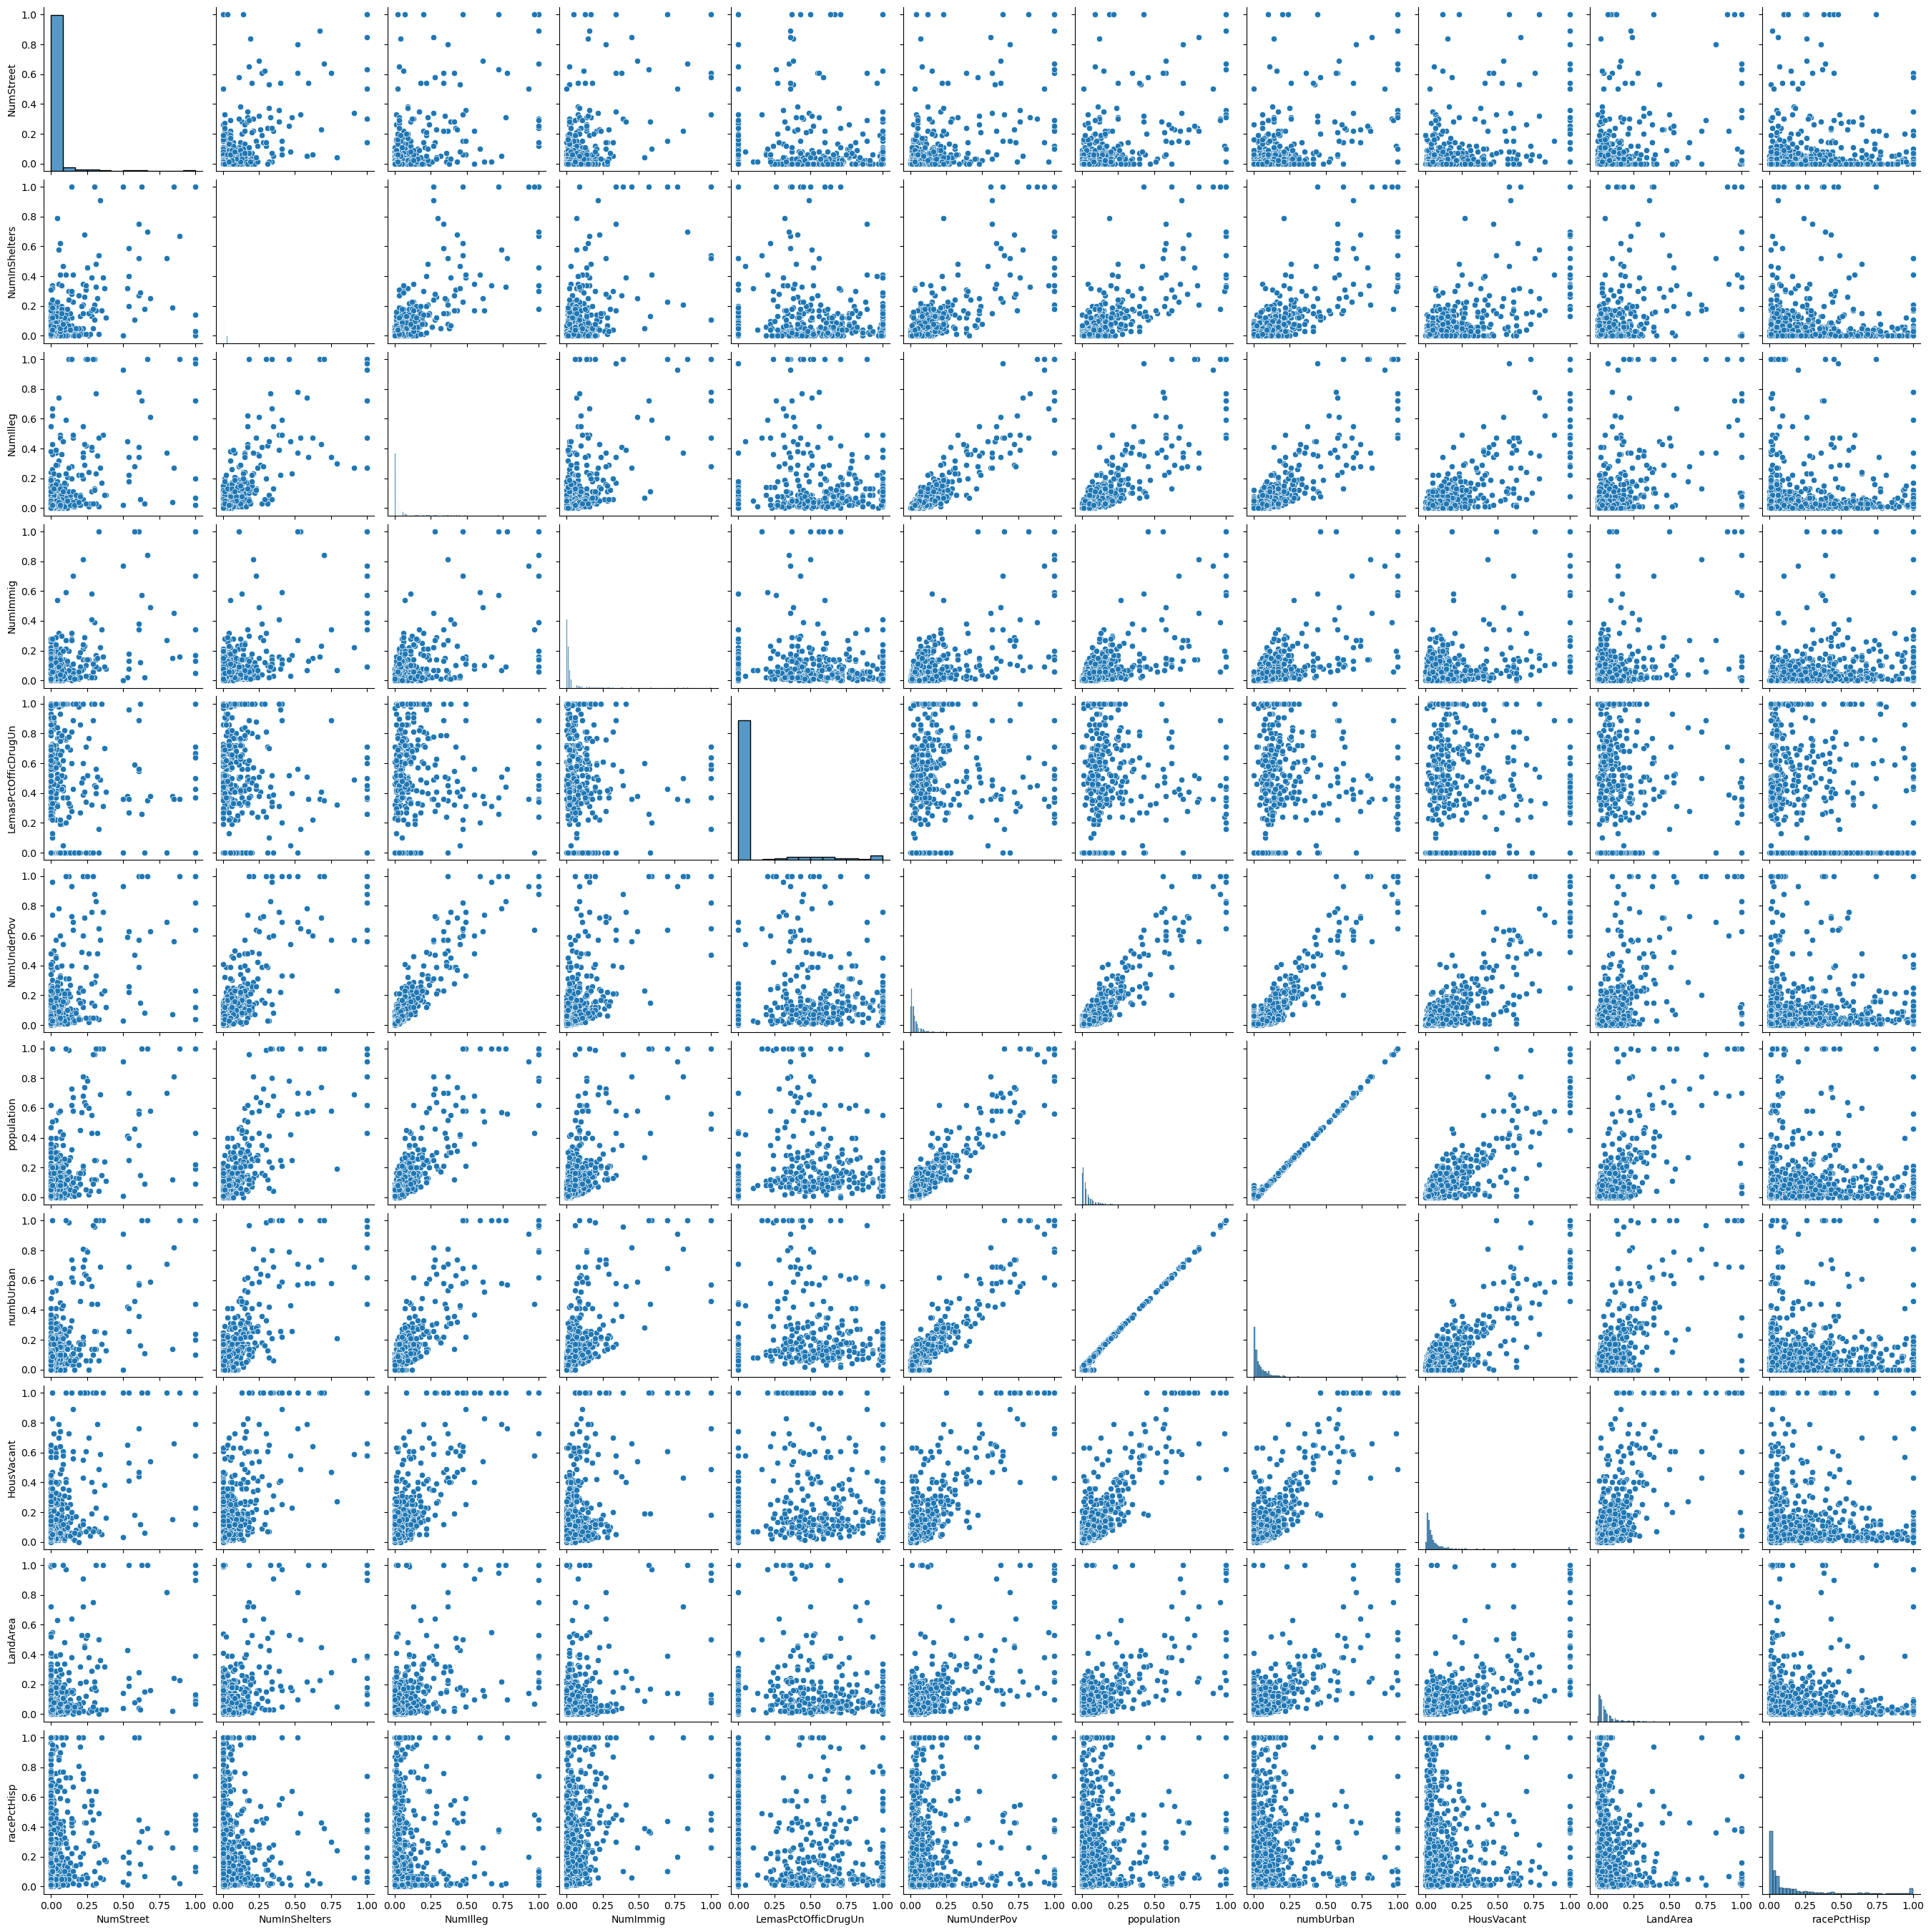

In [23]:
sns.pairplot(data=concat_df[top_columns])

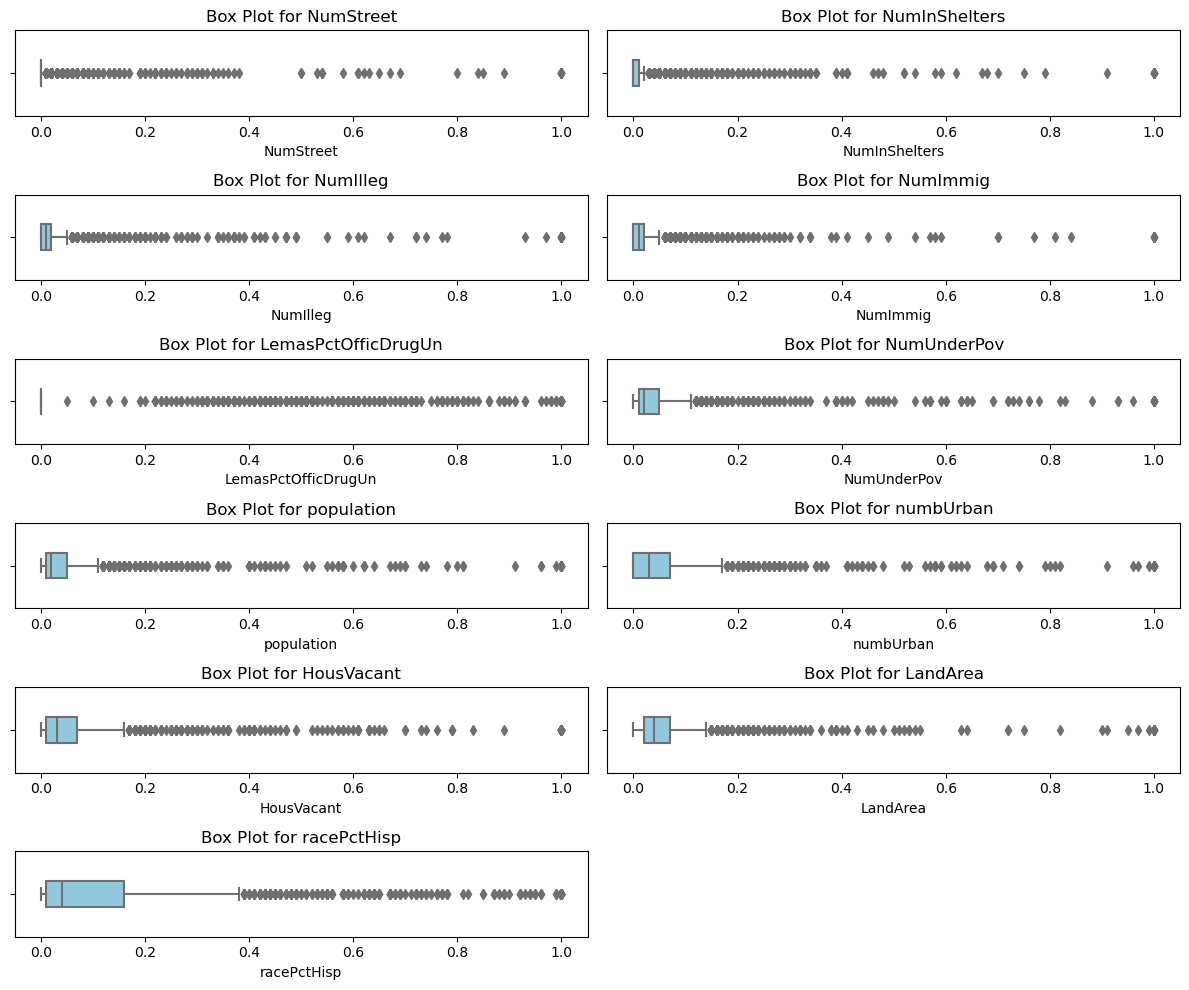

In [24]:
top_columns_df = concat_df[top_columns]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(top_columns_df.columns):
    sns.boxplot(x=top_columns_df[column], ax=axes[i], color='skyblue', width=0.3)  # Adjust color and width as needed
    axes[i].set_title(f'Box Plot for {column}')

for j in range(len(top_columns_df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()    
plt.show()

<font size=4>
- From just looking at the scatterplots I am not able to make any conclusions given the nature of the plots<br>
- Looking at the box plots, the median and 1st quartile are the same for NumStreet & LemasPctOfficDrugUn

<font size=5>**(2f) Fit a linear model using least squares to the training set and report the test error**

In [25]:
# x_train = concat_df.iloc[:,:-1]
# y_train = concat_df.iloc[:,-1:]

# x_test = concat_df.iloc[:,:-1]
# y_test = concat_df.iloc[:,-1:]
x = concat_df.iloc[:, :-1]
y = concat_df.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)

y_train_pred = model.predict(x_train)
train_error = mean_squared_error(y_train, y_train_pred)

print(f"Test error: {test_error:.6f}")
print(f"Train error: {train_error:.6f}")

coefficients = {}
i = 0
coefficients['intercept'] = model.intercept_[0]
for column in x_train.columns:
    coefficients[column] = model.coef_[0][i]
    i += 1
coefficients

coeff_df = pd.DataFrame([coefficients]).T
coeff_df.columns = ['coefficients']
coeff_df

Test error: 0.021785
Train error: 0.016352


,coefficients
intercept,0.757306
population,0.250890
householdsize,0.021723
racepctblack,0.184168
racePctWhite,-0.036382
...,...
PolicOperBudg,0.337840
LemasPctPolicOnPatr,-0.010991
LemasGangUnitDeploy,-0.008121
LemasPctOfficDrugUn,0.037092


<font size=5>**(2g) Fit a ridge regression model on the training set and report the test error**

In [26]:
print("Ridge Regression with Cross-Validation")
alphas = np.logspace(-6, 6, 13)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

ridge_cv.fit(x_train, y_train)

optimal_alpha = ridge_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

y_pred = ridge_cv.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test Error: {test_error:.6f}")

Ridge Regression with Cross-Validation
Optimal alpha: 1.0
Test Error: 0.017543


<font size=5>**(2h) Fit a LASSO model on the training set. Report test error along with a list of the variables selected by the model.<br>
Repeat with standardized features**

In [27]:
print("LASSO with Cross-Validation")
alphas = [10**i for i in range(-10, 10)]
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(x_train, y_train)

optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

y_pred = lasso_cv.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test Error: {test_error:.6f}")

LASSO with Cross-Validation
Optimal alpha: 0.001
Test Error: 0.017299


In [28]:
print("LASSO with Cross-Validation with standardized features")
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler.fit_transform(y_train)

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(x_train_scaled, y_train_scaled)
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

y_pred = lasso_cv.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test Error: {test_error:.6f}")


LASSO with Cross-Validation with standardized features
Optimal alpha: 0.01
Test Error: 0.099261


<font size=4>
- The test error is less when running LASSO when using non-standardized features (0.017) vs when using standardized features (0.099)

<font size=5>**(2i) Fit a PCR model on the training set with M chose by cross-validation.**

In [29]:
print("PCR model with M")
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=5)), ('regression', LinearRegression())])

param_grid = {'pca__n_components': [i for i in range(2, len(x_train.columns))]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_n_components = grid_search.best_params_['pca__n_components']
print(f"Best number of compoents (M): {best_n_components}")

y_pred = grid_search.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test error: {test_error:.6f}")

PCR model with M
Best number of compoents (M): 84
Test error: 0.018224


<font size=5>**(2j) We would like to fit a boosting tree to the data. Use L1-penalized regression at each node.<br>
Such tree is called L1-penalized gradient boosting tree. You can use XGboost to fit the model tree.<br>
determine alpha (regularized term) using cross-validation**

In [30]:
!pip install xgboost
import xgboost as xgb

In [31]:
print("L1-penalized gradient boosting tree")
xgb_reg = xgb.XGBRegressor()

param_grid = {
    'alpha': [i for i in range(0, 100)]  # Specify the values to test for alpha
}
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best value of alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

y_pred = grid_search.predict(x_test)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test error: {test_error:.6f}")    


L1-penalized gradient boosting tree
Best Alpha: 5
Test error: 0.018909


<font size=5>